In [1]:
!pip install pandas numpy scikit-learn matplotlib seaborn

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', None)
sns.set_theme(style="whitegrid")

df_spotify_csv = pd.read_csv('../datasets/spotify_data.csv', index_col=0)




In [4]:
print("----------Info DataFrames----------")
print()
print()
print(df_spotify_csv.info())
print("----------valores nulos en los  DataFrames----------")
print()
print()
print(df_spotify_csv.isnull().sum())
print("----------Mostrar los cinco primeras filas de los DataFrames----------")
print()
print()
print(df_spotify_csv.head(10))



----------Info DataFrames----------


<class 'pandas.core.frame.DataFrame'>
Index: 1159764 entries, 0 to 1473395
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   artist_name       1159749 non-null  object 
 1   track_name        1159763 non-null  object 
 2   track_id          1159764 non-null  object 
 3   popularity        1159764 non-null  int64  
 4   year              1159764 non-null  int64  
 5   genre             1159764 non-null  object 
 6   danceability      1159764 non-null  float64
 7   energy            1159764 non-null  float64
 8   key               1159764 non-null  int64  
 9   loudness          1159764 non-null  float64
 10  mode              1159764 non-null  int64  
 11  speechiness       1159764 non-null  float64
 12  acousticness      1159764 non-null  float64
 13  instrumentalness  1159764 non-null  float64
 14  liveness          1159764 non-null  float64
 15  valence         

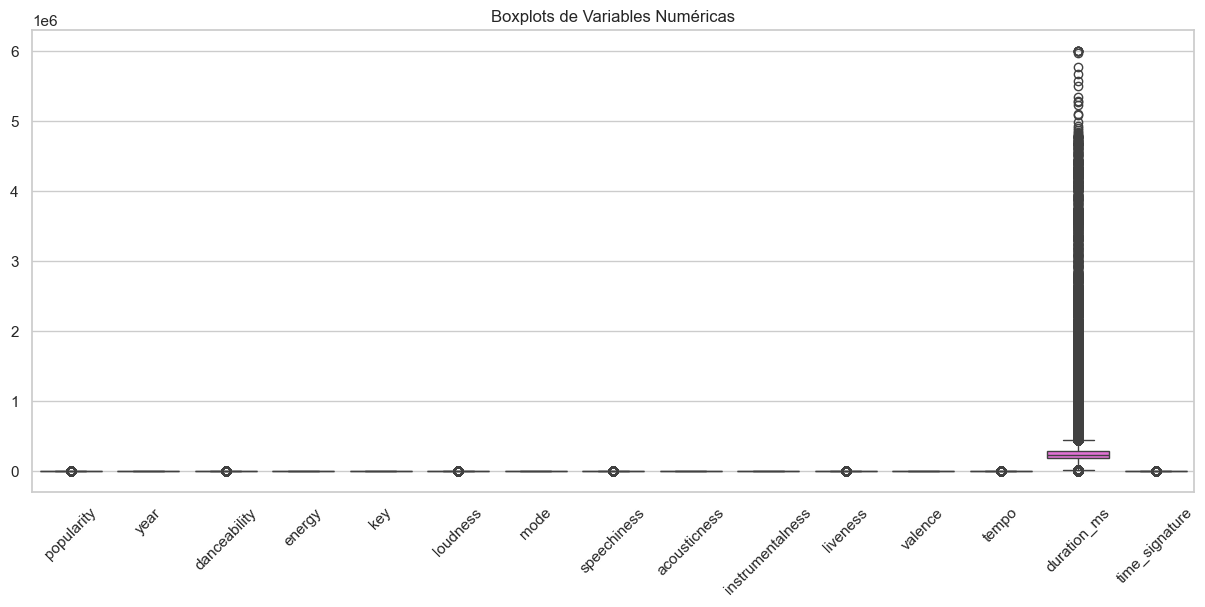

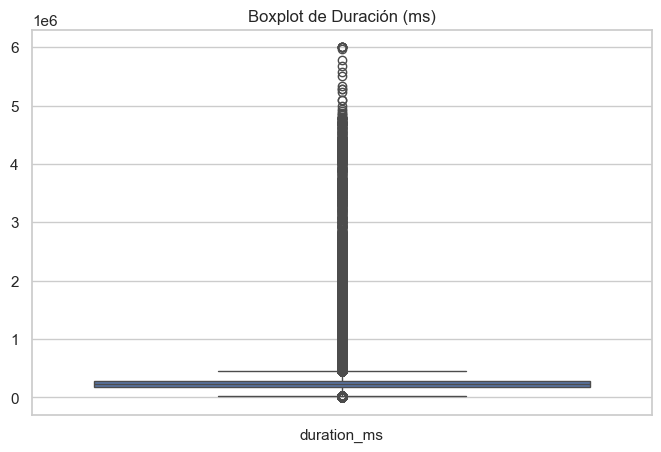

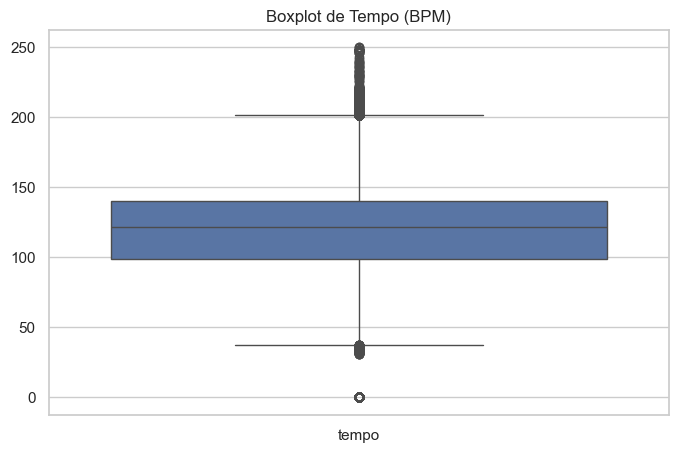

In [16]:
# Boxplots para ver outliers
numerical_cols = df_spotify_csv.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,6))
sns.boxplot(data=df_spotify_csv[numerical_cols])
plt.title("Boxplots de Variables Numéricas")
plt.xticks(rotation=45)
plt.show()


# Gráfico solo para la duración
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_spotify_csv[['duration_ms']])
plt.title('Boxplot de Duración (ms)')
plt.show()

# Gráfico solo para el tempo
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_spotify_csv[['tempo']])
plt.title('Boxplot de Tempo (BPM)')
plt.show()

In [4]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
X_train = pd.read_parquet('datasets/X_train.parquet')
COLS_TEXTO = ['artist_name', 'track_name', 'track_id', 'genre']
cols_a_eliminar = [c for c in COLS_TEXTO if c in X_train.columns]
X_train.drop(columns=cols_a_eliminar, inplace=True)
clust_feats = ['instrumentalness', 'speechiness', 'danceability', 'valence', 'tempo']
X = X_train[clust_feats]
X.head()



instrumentalness speechiness danceability valence    tempo
0              0.0      0.0333        0.329   0.227  127.119
1           0.0614      0.0427        0.542   0.585  136.035
2              0.0      0.0332        0.566   0.523  134.865
3         0.000535       0.037        0.307   0.416   81.926
4         3.94e-06      0.0532        0.705   0.641  116.044

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

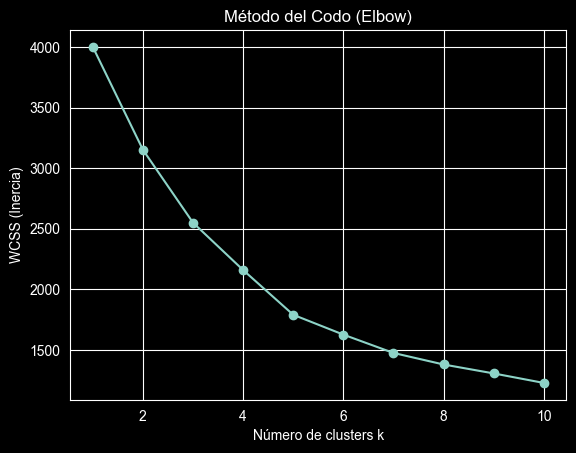

In [6]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(K, wcss, marker='o')
plt.title("Método del Codo (Elbow)")
plt.xlabel("Número de clusters k")
plt.ylabel("WCSS (Inercia)")
plt.grid(True)
plt.show()
